In [1]:
import pandas as pd 
import os 
import tensorflow as tf 
from tensorflow.keras.layers import Conv2D, Flatten, Dropout, Dense, MaxPooling2D
import cv2
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras import Model, Input

In [2]:
images = []
labels = []

main_dir = 'brain_tumor_dataset'

for subdir in os.listdir(main_dir):
    subdir_path = os.path.join(main_dir, subdir)
    if os.path.isdir(subdir_path):
        for file in os.listdir(subdir_path):
            file_path = os.path.join(subdir_path, file)
            if os.path.isfile(file_path):
                images.append(file_path)
                labels.append(subdir)


In [3]:
len(images)

253

In [4]:
x_train, x_val, y_train, y_val = train_test_split(np.array(images), np.array(labels), test_size=0.4)
x_val, x_test, y_val, y_test = train_test_split(x_val, y_val, test_size=0.5)

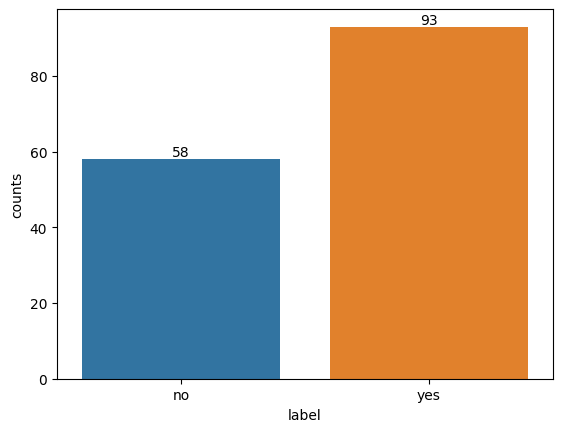

In [5]:
unique, count = np.unique(y_train, return_counts=True)
label_df = pd.DataFrame({'label': unique, 'counts': count})
ax = sns.barplot(data = label_df, x = 'label', y = 'counts')

for containers in ax.containers:
    ax.bar_label(containers)

plt.show()

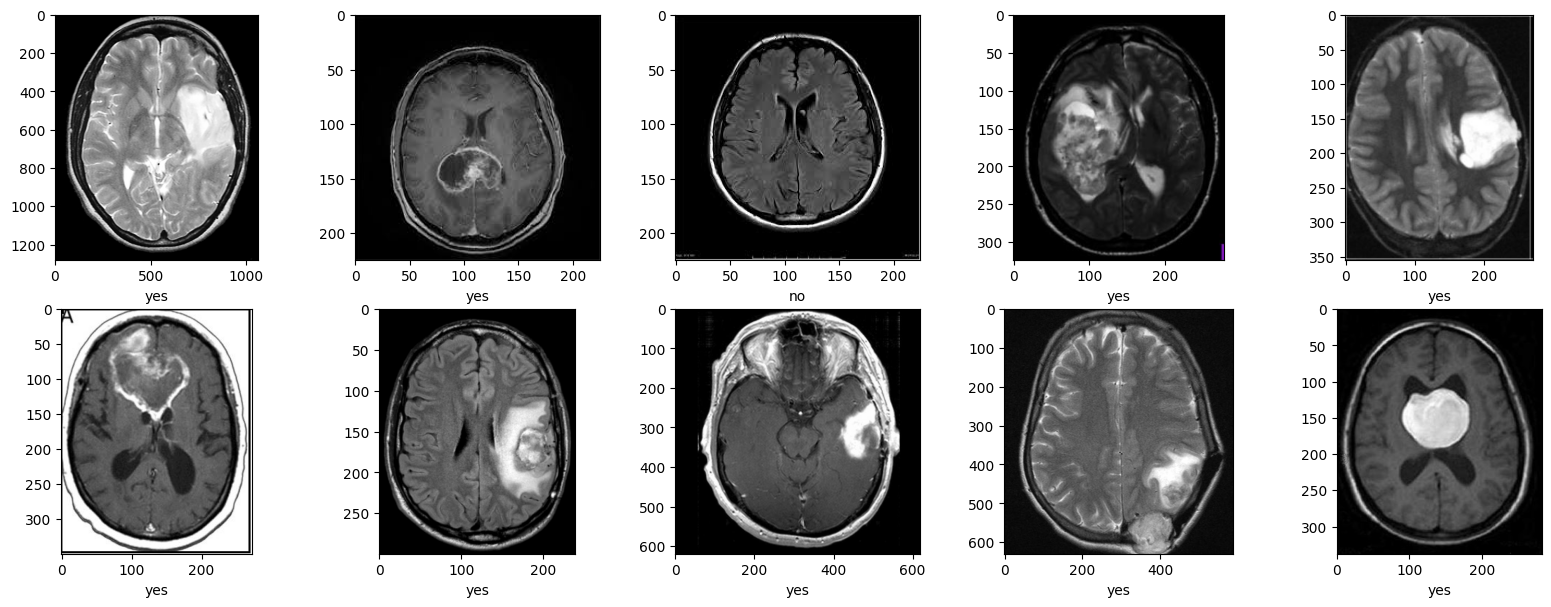

In [6]:
_, ax =  plt.subplots(2,5, figsize = (20,7))

for i in range(10):
    ax[i//5, i%5].imshow(cv2.imread(x_train[i]))
    ax[i//5, i%5].set_xlabel(y_train[i])

In [7]:
label_bin = LabelBinarizer()
y_train = label_bin.fit_transform(y_train)
y_val = label_bin.fit_transform(y_val)
y_test = label_bin.fit_transform(y_test)

In [8]:
def prepocessing_image(path):
    img = cv2.imread(path)
    img = cv2.resize(img, (128, 128), interpolation=cv2.INTER_LINEAR)
    img = (img/255.0).astype(np.float32)
    return img

In [9]:
x_train = np.array(list(map(prepocessing_image, x_train)))
x_test = np.array(list(map(prepocessing_image, x_test)))
x_val = np.array(list(map(prepocessing_image, x_val)))

In [10]:
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(64).shuffle(64).prefetch(buffer_size=64)
val_data = tf.data.Dataset.from_tensor_slices((x_val, y_val)).batch(64).prefetch(buffer_size=64)
test_data = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(64)


In [11]:
input_conv = Input(shape = (x_train.shape[1], x_train.shape[2], x_train.shape[3]))
x = Conv2D(filters = 100, kernel_size = 5, activation = 'relu')(input_conv)
x = MaxPooling2D(2)(x)
x = Flatten()(x)
output_conv = Dense(1, activation = 'sigmoid')(x)

model_1 = Model(input_conv, output_conv)
model_1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model_1.summary()




Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 124, 124, 100)     7600      
                                                                 
 max_pooling2d (MaxPooling2  (None, 62, 62, 100)       0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 384400)            0         
                                                                 
 dense (Dense)               (None, 1)                 384401    
                                                                 
Total params: 392001 (1.50 MB)
Trainable params: 392001 (1.50 MB)
Non-trainable params: 0 (0.00 Byte)
______________________

In [12]:
model_1.fit(train_data, epochs = 10, validation_data=(val_data))

Epoch 1/10


3/3 [==============================] - 2s 420ms/step - loss: 2.0925 - accuracy: 0.5695 - val_loss: 0.9323 - val_accuracy: 0.6667
Epoch 2/10
3/3 [==============================] - 1s 378ms/step - loss: 0.8659 - accuracy: 0.5497 - val_loss: 0.7031 - val_accuracy: 0.6863
Epoch 3/10
3/3 [==============================] - 1s 374ms/step - loss: 0.4943 - accuracy: 0.7815 - val_loss: 0.5820 - val_accuracy: 0.7647
Epoch 4/10
3/3 [==============================] - 1s 394ms/step - loss: 0.4223 - accuracy: 0.8013 - val_loss: 0.5436 - val_accuracy: 0.7647
Epoch 5/10
3/3 [==============================] - 1s 378ms/step - loss: 0.3778 - accuracy: 0.8013 - val_loss: 0.5459 - val_accuracy: 0.8039
Epoch 6/10
3/3 [==============================] - 1s 386ms/step - loss: 0.3224 - accuracy: 0.8742 - val_loss: 0.5517 - val_accuracy: 0.8235
Epoch 7/10
3/3 [==============================] - 1s 532ms/step - loss: 0.2514 - accuracy: 0.9073 - val_loss: 0.6150 - val_accuracy: 0.7843
Epoch 8/10
3/3 [==

In [13]:
results = model_1.evaluate(test_data)
print(results[1])

1/1 [==============================] - 0s 110ms/step - loss: 0.5398 - accuracy: 0.8039
0.8039215803146362


In [14]:
input_conv = Input(shape = (x_train.shape[1], x_train.shape[2], x_train.shape[3]))
x = Conv2D(filters = 100, kernel_size = 5, activation = 'relu')(input_conv)
x = MaxPooling2D(2)(x)
x = Dropout(0.4)(x)
x = Flatten()(x)
output_conv = Dense(1, activation = 'sigmoid')(x)

model_2 = Model(input_conv, output_conv)
model_2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model_2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 100)     7600      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 100)       0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 62, 62, 100)       0         
                                                                 
 flatten_1 (Flatten)         (None, 384400)            0         
                                                                 
 dense_1 (Dense)             (None, 1)                 384401    
                                                           

In [15]:
model_2.fit(train_data, epochs = 10, validation_data=(val_data))

Epoch 1/10
3/3 [==============================] - 2s 433ms/step - loss: 2.1110 - accuracy: 0.5762 - val_loss: 0.8409 - val_accuracy: 0.7059
Epoch 2/10
3/3 [==============================] - 1s 450ms/step - loss: 0.8936 - accuracy: 0.5364 - val_loss: 0.7212 - val_accuracy: 0.6667
Epoch 3/10
3/3 [==============================] - 1s 606ms/step - loss: 0.4939 - accuracy: 0.7815 - val_loss: 0.5539 - val_accuracy: 0.7451
Epoch 4/10
3/3 [==============================] - 1s 589ms/step - loss: 0.4341 - accuracy: 0.8079 - val_loss: 0.5753 - val_accuracy: 0.7451
Epoch 5/10
3/3 [==============================] - 1s 592ms/step - loss: 0.3953 - accuracy: 0.8013 - val_loss: 0.5555 - val_accuracy: 0.7647
Epoch 6/10
3/3 [==============================] - 1s 610ms/step - loss: 0.3355 - accuracy: 0.8543 - val_loss: 0.5576 - val_accuracy: 0.7647
Epoch 7/10
3/3 [==============================] - 1s 428ms/step - loss: 0.2822 - accuracy: 0.8808 - val_loss: 0.5786 - val_accuracy: 0.7843
Epoch 8/10
3/3 [====

In [16]:
results = model_2.evaluate(test_data)
print(results[1])

1/1 [==============================] - 0s 118ms/step - loss: 0.5330 - accuracy: 0.8039
0.8039215803146362


In [17]:
input_conv = Input(shape = (x_train.shape[1], x_train.shape[2], x_train.shape[3]))
x = Conv2D(filters = 100, kernel_size = 5, activation = 'relu')(input_conv)
x = MaxPooling2D(2)(x)
x = Flatten()(x)
x = Dropout(0.4)(x)
output_conv = Dense(1, activation = 'sigmoid')(x)

model_3 = Model(input_conv, output_conv)
model_3.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model_3.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 100)     7600      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 62, 62, 100)       0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 384400)            0         
                                                                 
 dropout_1 (Dropout)         (None, 384400)            0         
                                                                 
 dense_2 (Dense)             (None, 1)                 384401    
                                                           

In [18]:
model_3.fit(train_data, epochs = 10, validation_data=(val_data))

Epoch 1/10
3/3 [==============================] - 2s 456ms/step - loss: 1.5995 - accuracy: 0.6490 - val_loss: 2.2883 - val_accuracy: 0.3725
Epoch 2/10
3/3 [==============================] - 1s 642ms/step - loss: 0.8425 - accuracy: 0.6556 - val_loss: 0.7228 - val_accuracy: 0.7059
Epoch 3/10
3/3 [==============================] - 1s 433ms/step - loss: 0.5002 - accuracy: 0.7947 - val_loss: 0.5796 - val_accuracy: 0.7647
Epoch 4/10
3/3 [==============================] - 1s 630ms/step - loss: 0.4198 - accuracy: 0.7947 - val_loss: 0.5455 - val_accuracy: 0.7843
Epoch 5/10
3/3 [==============================] - 1s 430ms/step - loss: 0.3577 - accuracy: 0.8477 - val_loss: 0.5486 - val_accuracy: 0.7843
Epoch 6/10
3/3 [==============================] - 1s 617ms/step - loss: 0.3199 - accuracy: 0.8675 - val_loss: 0.5848 - val_accuracy: 0.7843
Epoch 7/10
3/3 [==============================] - 1s 593ms/step - loss: 0.2737 - accuracy: 0.9007 - val_loss: 0.6044 - val_accuracy: 0.7843
Epoch 8/10
3/3 [====

In [19]:
results = model_3.evaluate(test_data)
print(results[1])

1/1 [==============================] - 0s 118ms/step - loss: 0.5208 - accuracy: 0.8235
0.8235294222831726


In [20]:
from tensorflow.keras.regularizers import l2, l1

In [21]:
input_conv = Input(shape = (x_train.shape[1], x_train.shape[2], x_train.shape[3]))
x = Conv2D(filters = 100, kernel_size = 5, activation = 'relu')(input_conv)
x = MaxPooling2D(2)(x)
x = Flatten()(x)
output_conv = Dense(1, activation = 'sigmoid', kernel_regularizer = l2() )(x)

model_4 = Model(input_conv, output_conv)
model_4.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model_4.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_3 (Conv2D)           (None, 124, 124, 100)     7600      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 62, 62, 100)       0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 384400)            0         
                                                                 
 dense_3 (Dense)             (None, 1)                 384401    
                                                                 
Total params: 392001 (1.50 MB)
Trainable params: 392001 (1.50 MB)
Non-trainable params: 0 (0.00 Byte)
_______________________

In [22]:
model_4.fit(train_data, epochs = 10, validation_data=(val_data))

Epoch 1/10
3/3 [==============================] - 1s 380ms/step - loss: 2.3542 - accuracy: 0.6093 - val_loss: 1.0255 - val_accuracy: 0.6471
Epoch 2/10
3/3 [==============================] - 1s 504ms/step - loss: 0.7575 - accuracy: 0.6093 - val_loss: 0.7377 - val_accuracy: 0.6863
Epoch 3/10
3/3 [==============================] - 1s 370ms/step - loss: 0.5517 - accuracy: 0.7616 - val_loss: 0.5955 - val_accuracy: 0.7647
Epoch 4/10
3/3 [==============================] - 1s 523ms/step - loss: 0.4777 - accuracy: 0.8079 - val_loss: 0.6046 - val_accuracy: 0.7647
Epoch 5/10
3/3 [==============================] - 1s 378ms/step - loss: 0.4482 - accuracy: 0.8212 - val_loss: 0.5923 - val_accuracy: 0.7843
Epoch 6/10
3/3 [==============================] - 1s 367ms/step - loss: 0.3977 - accuracy: 0.8543 - val_loss: 0.6090 - val_accuracy: 0.7647
Epoch 7/10
3/3 [==============================] - 1s 365ms/step - loss: 0.3532 - accuracy: 0.8940 - val_loss: 0.6217 - val_accuracy: 0.7843
Epoch 8/10
3/3 [====

In [23]:
results = model_4.evaluate(test_data)
print(results[1])

1/1 [==============================] - 0s 127ms/step - loss: 0.6244 - accuracy: 0.8039
0.8039215803146362


In [24]:
input_conv = Input(shape = (x_train.shape[1], x_train.shape[2], x_train.shape[3]))
x = Conv2D(filters = 100, kernel_size = 5, activation = 'relu')(input_conv)
x = MaxPooling2D(2)(x)
x = Flatten()(x)
x = Dense(128, activation = 'relu')(x)
output_conv = Dense(1, activation = 'sigmoid', activity_regularizer = l2(0.01), kernel_regularizer = l1(0.01) )(x)

model_5 = Model(input_conv, output_conv)
model_5.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model_5.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 124, 124, 100)     7600      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 100)       0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 384400)            0         
                                                                 
 dense_4 (Dense)             (None, 128)               49203328  
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                           

In [25]:
model_5.fit(train_data, epochs = 10, validation_data=(val_data))

Epoch 1/10
3/3 [==============================] - 3s 1s/step - loss: 6.0683 - accuracy: 0.6159 - val_loss: 8.3935 - val_accuracy: 0.3725
Epoch 2/10
3/3 [==============================] - 3s 842ms/step - loss: 4.3887 - accuracy: 0.4172 - val_loss: 0.7029 - val_accuracy: 0.7647
Epoch 3/10
3/3 [==============================] - 3s 837ms/step - loss: 0.6411 - accuracy: 0.7682 - val_loss: 0.7555 - val_accuracy: 0.6863
Epoch 4/10
3/3 [==============================] - 3s 807ms/step - loss: 0.6107 - accuracy: 0.7881 - val_loss: 0.6697 - val_accuracy: 0.7451
Epoch 5/10
3/3 [==============================] - 3s 830ms/step - loss: 0.5684 - accuracy: 0.7947 - val_loss: 0.6496 - val_accuracy: 0.7843
Epoch 6/10
3/3 [==============================] - 3s 806ms/step - loss: 0.4552 - accuracy: 0.8675 - val_loss: 0.6430 - val_accuracy: 0.7843
Epoch 7/10
3/3 [==============================] - 3s 815ms/step - loss: 0.4054 - accuracy: 0.9073 - val_loss: 0.6898 - val_accuracy: 0.7647
Epoch 8/10
3/3 [=======

In [26]:
results = model_5.evaluate(test_data)
print(results[1])

1/1 [==============================] - 0s 154ms/step - loss: 0.5782 - accuracy: 0.8235
0.8235294222831726


In [27]:
input_conv = Input(shape = (x_train.shape[1], x_train.shape[2], x_train.shape[3]))
x = Conv2D(filters = 100, kernel_size = 5, activation = 'relu')(input_conv)
x = MaxPooling2D(2)(x)
x = Flatten()(x)
x = Dense(128, activation = 'relu')(x)
x = Dropout(0.4)(x)
output_conv = Dense(1, activation = 'sigmoid', activity_regularizer = l2(0.01), kernel_regularizer = l1(0.01) )(x)

model_6 = Model(input_conv, output_conv)
model_6.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model_6.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_5 (Conv2D)           (None, 124, 124, 100)     7600      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 62, 62, 100)       0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 384400)            0         
                                                                 
 dense_6 (Dense)             (None, 128)               49203328  
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                           

In [28]:
model_6.fit(train_data, epochs = 10, validation_data=(val_data))

Epoch 1/10
3/3 [==============================] - 3s 984ms/step - loss: 5.9365 - accuracy: 0.5695 - val_loss: 1.3468 - val_accuracy: 0.6667
Epoch 2/10
3/3 [==============================] - 3s 822ms/step - loss: 1.4986 - accuracy: 0.6887 - val_loss: 1.5562 - val_accuracy: 0.7255
Epoch 3/10
3/3 [==============================] - 3s 832ms/step - loss: 0.9318 - accuracy: 0.7947 - val_loss: 0.8140 - val_accuracy: 0.6863
Epoch 4/10
3/3 [==============================] - 3s 977ms/step - loss: 0.5588 - accuracy: 0.7947 - val_loss: 0.7335 - val_accuracy: 0.7451
Epoch 5/10
3/3 [==============================] - 3s 806ms/step - loss: 0.4618 - accuracy: 0.8808 - val_loss: 0.7300 - val_accuracy: 0.7647
Epoch 6/10
3/3 [==============================] - 3s 820ms/step - loss: 0.3767 - accuracy: 0.9007 - val_loss: 0.8248 - val_accuracy: 0.7843
Epoch 7/10
3/3 [==============================] - 3s 849ms/step - loss: 0.3287 - accuracy: 0.9205 - val_loss: 0.7991 - val_accuracy: 0.8039
Epoch 8/10
3/3 [====

In [29]:
results = model_6.evaluate(test_data)
print(results[1])

1/1 [==============================] - 0s 180ms/step - loss: 0.6581 - accuracy: 0.8431
0.843137264251709


In [30]:
input_conv = Input(shape = (x_train.shape[1], x_train.shape[2], x_train.shape[3]))
x = Conv2D(filters = 100, kernel_size = 5, activation = 'relu')(input_conv)
x = MaxPooling2D(2)(x)
x = Flatten()(x)
x = Dense(128, activation = 'relu')(x)
x = Dropout(0.2)(x)
output_conv = Dense(1, activation = 'sigmoid', activity_regularizer = l2(0.01), kernel_regularizer = l1(0.01) )(x)

model_7 = Model(input_conv, output_conv)
model_7.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model_7.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_6 (Conv2D)           (None, 124, 124, 100)     7600      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 62, 62, 100)       0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 384400)            0         
                                                                 
 dense_8 (Dense)             (None, 128)               49203328  
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                           

In [31]:
model_7.fit(train_data, epochs = 10, validation_data=(val_data))

Epoch 1/10
3/3 [==============================] - 3s 822ms/step - loss: 7.6197 - accuracy: 0.4901 - val_loss: 2.8139 - val_accuracy: 0.5882
Epoch 2/10
3/3 [==============================] - 3s 800ms/step - loss: 3.0075 - accuracy: 0.5497 - val_loss: 1.5808 - val_accuracy: 0.7451
Epoch 3/10
3/3 [==============================] - 3s 859ms/step - loss: 1.2128 - accuracy: 0.7947 - val_loss: 1.3969 - val_accuracy: 0.7059
Epoch 4/10
3/3 [==============================] - 3s 814ms/step - loss: 0.9260 - accuracy: 0.7682 - val_loss: 0.8591 - val_accuracy: 0.7843
Epoch 5/10
3/3 [==============================] - 3s 828ms/step - loss: 0.5474 - accuracy: 0.8013 - val_loss: 0.7656 - val_accuracy: 0.7451
Epoch 6/10
3/3 [==============================] - 3s 832ms/step - loss: 0.4639 - accuracy: 0.8543 - val_loss: 0.7274 - val_accuracy: 0.7647
Epoch 7/10
3/3 [==============================] - 3s 952ms/step - loss: 0.4104 - accuracy: 0.9205 - val_loss: 0.7344 - val_accuracy: 0.7647
Epoch 8/10
3/3 [====

In [32]:
results = model_7.evaluate(test_data)
print(results[1])

1/1 [==============================] - 0s 137ms/step - loss: 0.5585 - accuracy: 0.8431
0.843137264251709


In [33]:
input_conv = Input(shape = (x_train.shape[1], x_train.shape[2], x_train.shape[3]))
x = Conv2D(filters = 100, kernel_size = 5, activation = 'relu')(input_conv)
x = MaxPooling2D(2)(x)
x = Flatten()(x)
x = Dense(128, activation = 'relu')(x)
x = Dropout(0.5)(x)
output_conv = Dense(1, activation = 'sigmoid', activity_regularizer = l2(0.01), kernel_regularizer = l1(0.01) )(x)

model_8 = Model(input_conv, output_conv)
model_8.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model_8.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_7 (Conv2D)           (None, 124, 124, 100)     7600      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 62, 62, 100)       0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 384400)            0         
                                                                 
 dense_10 (Dense)            (None, 128)               49203328  
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                           

In [34]:
model_8.fit(train_data, epochs = 10, validation_data=(val_data))

Epoch 1/10
3/3 [==============================] - 3s 835ms/step - loss: 5.5728 - accuracy: 0.5960 - val_loss: 1.9118 - val_accuracy: 0.7451
Epoch 2/10
3/3 [==============================] - 2s 933ms/step - loss: 1.0353 - accuracy: 0.7483 - val_loss: 1.2481 - val_accuracy: 0.7451
Epoch 3/10
3/3 [==============================] - 3s 797ms/step - loss: 0.7974 - accuracy: 0.7815 - val_loss: 0.8846 - val_accuracy: 0.7647
Epoch 4/10
3/3 [==============================] - 2s 806ms/step - loss: 0.5115 - accuracy: 0.8543 - val_loss: 0.7647 - val_accuracy: 0.7647
Epoch 5/10
3/3 [==============================] - 3s 968ms/step - loss: 0.4001 - accuracy: 0.9338 - val_loss: 0.7800 - val_accuracy: 0.7647
Epoch 6/10
3/3 [==============================] - 2s 968ms/step - loss: 0.3277 - accuracy: 0.9404 - val_loss: 0.9001 - val_accuracy: 0.7647
Epoch 7/10
3/3 [==============================] - 3s 811ms/step - loss: 0.2848 - accuracy: 0.9470 - val_loss: 0.9068 - val_accuracy: 0.7843
Epoch 8/10
3/3 [====

In [35]:
results = model_8.evaluate(test_data)
print(results[1])

1/1 [==============================] - 0s 164ms/step - loss: 0.7281 - accuracy: 0.8431
0.843137264251709


In [37]:
input_conv = Input(shape = (x_train.shape[1], x_train.shape[2], x_train.shape[3]))
x = Conv2D(filters = 100, kernel_size = 5, activation = 'relu')(input_conv)
x = Conv2D(filters = 200, kernel_size = 5, activation = 'relu')(x)
x = MaxPooling2D(2)(x)
x = Dropout(0.6)(x)
x = Flatten()(x)
x = Dense(128, activation = 'relu')(x)
output_conv = Dense(1, activation = 'sigmoid', activity_regularizer = l2(0.01), kernel_regularizer = l1(0.01) )(x)

model_9 = Model(input_conv, output_conv)
model_9.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model_9.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_10 (Conv2D)          (None, 124, 124, 100)     7600      
                                                                 
 conv2d_11 (Conv2D)          (None, 120, 120, 200)     500200    
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 60, 60, 200)       0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 60, 60, 200)       0         
                                                                 
 flatten_9 (Flatten)         (None, 720000)            0         
                                                           

In [38]:
model_9.fit(train_data, epochs = 10, validation_data=(val_data))

Epoch 1/10
3/3 [==============================] - 18s 5s/step - loss: 5.8636 - accuracy: 0.4371 - val_loss: 1.0092 - val_accuracy: 0.3725
Epoch 2/10
3/3 [==============================] - 16s 5s/step - loss: 0.8080 - accuracy: 0.6159 - val_loss: 0.7514 - val_accuracy: 0.7451
Epoch 3/10
3/3 [==============================] - 16s 5s/step - loss: 0.6165 - accuracy: 0.8079 - val_loss: 0.9767 - val_accuracy: 0.7255
Epoch 4/10
3/3 [==============================] - 16s 5s/step - loss: 0.6015 - accuracy: 0.7947 - val_loss: 0.6730 - val_accuracy: 0.7451
Epoch 5/10
3/3 [==============================] - 16s 7s/step - loss: 0.5012 - accuracy: 0.8675 - val_loss: 0.7336 - val_accuracy: 0.7647
Epoch 6/10
3/3 [==============================] - 16s 7s/step - loss: 0.4477 - accuracy: 0.8609 - val_loss: 0.9071 - val_accuracy: 0.7843
Epoch 7/10
3/3 [==============================] - 16s 5s/step - loss: 0.3595 - accuracy: 0.9272 - val_loss: 0.8037 - val_accuracy: 0.7647
Epoch 8/10
3/3 [==================

In [39]:
results = model_9.evaluate(test_data)
print(results[1])

1/1 [==============================] - 1s 780ms/step - loss: 0.7688 - accuracy: 0.8431
0.843137264251709
